# Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Dataset/Diarrhea
%ls

/content/drive/MyDrive/Dataset/Diarrhea
 cos1.dot     Diare.csv    'Laporan Diare 2019.xls'   search2.csv   tree3.dot
 cusdm1.csv   dm01.csv      modelDT.pkl               search3.csv   tree4.dot
 cusdm2.csv   dm02.csv      normal.pkl                search4.csv   tree.dot
 cusdm3.csv   dm03.csv      over.pkl                  search.csv    under.pkl
 demo.csv     golf_df.csv   savecsv.csv               tree2.dot


In [3]:
import csv
import joblib
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from graphviz import Source
import matplotlib.pyplot as plt
from collections import Counter
from warnings import simplefilter
from sklearn.tree import export_text
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from IPython.display import display, SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#ignore all future warning
simplefilter(action='ignore', category=FutureWarning)
da= pd.read_csv('Diare.csv')
da

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
0,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Berlendir,Akut
1,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Akut
2,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Berlendir,Akut
3,Tidak,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Berlendir,Akut
4,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Berlendir,Akut
...,...,...,...,...,...,...,...,...,...
500,Tidak,Tidak,Ya,Tidak,NaN,Ya,Ya,Berdarah,Akut
501,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Berdarah,Akut
502,Ya,Tidak,Ya,Tidak,Tidak,Ya,Ya,Tidak,Akut
503,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Berlendir,Akut


Jumlah missing data:  23 



Text(0, 0.5, 'Frekuensi')

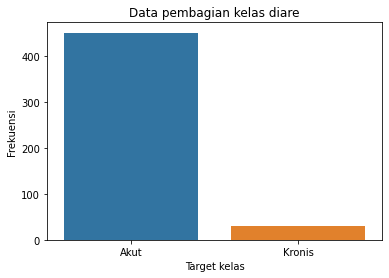

In [4]:
#drop missing data
data = da.dropna()
print('Jumlah missing data: ', (len(da)-len(data)),'\n')

# renaming label column on dataset
data = data.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})


#Check pembagian tiap target class
sns.countplot(x = data['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

In [5]:
#Encode using LabelEncoder

le = LabelEncoder()
clf= DecisionTreeClassifier(criterion='gini')
X = data.drop(columns='Diare')
y = data['Diare']

#applying label encoder untuk tiap atribut predictor
X = X.apply(le.fit_transform)

In [6]:
X

,Demam,Muntah,MK,Nyeri,BAB_1,BAB_2,FE,FBoB
0,0,1,1,1,0,1,0,1
1,0,0,0,0,0,1,1,2
2,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,1
4,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
498,1,0,0,1,1,1,1,0
499,1,0,0,1,1,1,1,0
501,0,1,1,0,0,0,1,0
502,1,0,1,0,0,1,1,2


# Learn model

In [7]:
def normal():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'normal.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def over():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_train))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'over.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def under():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=8)
  print(Counter(y_train))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'under.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({'Akut': 359, 'Kronis': 26}) 

              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        92
      Kronis       1.00      1.00      1.00         5

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



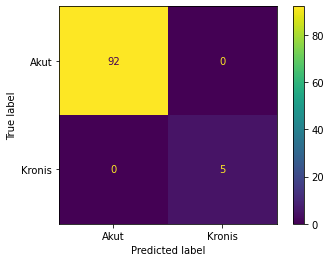

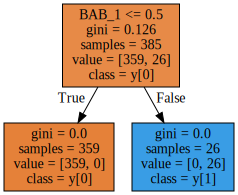



|--- feature_4 <= 0.50
|   |--- class: Akut
|--- feature_4 >  0.50
|   |--- class: Kronis



In [8]:
normal()

Counter({'Akut': 361, 'Kronis': 360})
              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        90
      Kronis       1.00      1.00      1.00        91

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



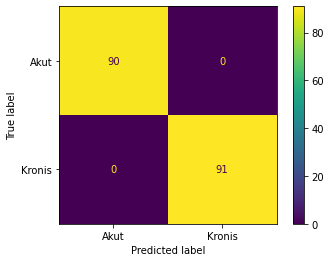

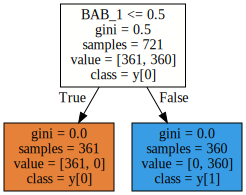



|--- feature_4 <= 0.50
|   |--- class: Akut
|--- feature_4 >  0.50
|   |--- class: Kronis



In [9]:
over()

Counter({'Kronis': 25, 'Akut': 24})
              precision    recall  f1-score   support

        Akut       1.00      0.86      0.92         7
      Kronis       0.86      1.00      0.92         6

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13



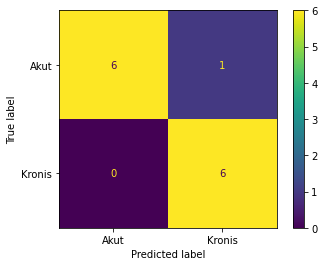

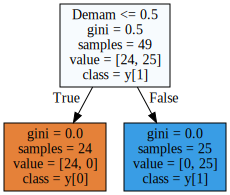



|--- feature_0 <= 0.50
|   |--- class: Akut
|--- feature_0 >  0.50
|   |--- class: Kronis



In [10]:
under()

# Test Predict start here

In [11]:
def test_normal():
  while True:
    class CustomException(Exception):
      pass #print('Please input integer between 0 and 2')

    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('normal.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')

#test_normal()

In [12]:
def test_over():
  while True:
    class CustomException(Exception):
      pass

    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('over.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')

#test_over()

In [13]:
def test_under():
  while True:
    class CustomException(Exception):
      pass
      
    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('under.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')


#test_under()

# Misc

In [14]:
def fast_n():
  predfast = [[0,1,1,1,1,1,1,0]]
  model = joblib.load('normal.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi normal', hasil)
fast_n()

def fast_o():
  predfast = [[0,1,1,1,1,1,1,0]]
  model = joblib.load('over.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi over', hasil)
fast_o()

def fast_u():
  predfast = [[0,1,1,1,1,1,1,0]]
  model = joblib.load('under.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi under', hasil)
fast_u()


 Prediksi normal ['Kronis']

 Prediksi over ['Kronis']

 Prediksi under ['Akut']


In [15]:

def counter():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']

  #applying label encoder untuk tiap atribut predictor
  X = X.apply(le.fit_transform)
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print('Normal')
  print(Counter(y_train), 'Train' )
  print(Counter(y_test), 'Test')

  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(X,y)
  XX_train, XX_test, yy_train, yy_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print( '\nOversampling')
  print(Counter(yy_train), 'Train' )
  print(Counter(yy_test), 'Test')

  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  XXX_train, XXX_test, yyy_train, yyy_test = tt(X_under, y_under, test_size=0.2, random_state=8)
  print('\nUndersampling')
  print(Counter(yyy_train), 'Train' )
  print(Counter(yyy_test), 'Test')

counter()

Normal
Counter({'Akut': 359, 'Kronis': 26}) Train
Counter({'Akut': 92, 'Kronis': 5}) Test

Oversampling
Counter({'Akut': 361, 'Kronis': 360}) Train
Counter({'Kronis': 91, 'Akut': 90}) Test

Undersampling
Counter({'Kronis': 25, 'Akut': 24}) Train
Counter({'Akut': 7, 'Kronis': 6}) Test


In [53]:
def sample():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  XXX_train, XXX_test, yyy_train, yyy_test = tt(X_under, y_under, test_size=0.2, random_state=8)
  print('\nUndersampling')
  print(XXX_test)


def sampleNormal():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']
  X = X.apply(le.fit_transform)
  X_train, X_test, y_train, y_test = tt(X,y, test_size = 0.2, random_state=8)
  print(X_test.head(60))

sampleNormal()

     Demam  Muntah  MK  Nyeri  BAB_1  BAB_2  FE  FBoB
89       0       1   1      1      0      0   1     2
335      0       1   0      1      0      1   0     1
8        0       0   1      0      0      1   1     2
258      0       0   0      0      0      1   1     0
168      0       0   0      0      0      1   1     0
41       1       1   0      1      1      1   1     0
120      0       1   0      1      0      1   1     2
130      1       1   0      0      0      0   1     0
0        0       1   1      1      0      1   0     1
300      0       1   1      1      0      0   1     1
315      0       0   1      0      0      1   1     1
273      0       1   1      0      0      0   1     1
383      0       0   0      1      0      1   1     1
214      0       0   1      1      0      1   1     1
107      0       1   0      0      0      0   1     1
128      0       0   0      1      0      0   1     1
27       0       1   1      0      0      0   1     1
308      1       0   1      